In [1]:
import pandas as pd
import os, sys
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))

from utils.prediction_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

import xgboost as xgb

random_seed = 42

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
X_orig, y_orig = get_data("conv2d", base_dir, sample_rate=1.0)
X_orig.info()

< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found


/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:251: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456435 entries, 0 to 456434
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   b             456435 non-null  int64  
 1   in_channels   456435 non-null  int64  
 2   iH            456435 non-null  int64  
 3   iW            456435 non-null  int64  
 4   out_channels  456435 non-null  int64  
 5   groups        456435 non-null  int64  
 6   kH            456435 non-null  int64  
 7   kW            456435 non-null  int64  
 8   stride        456435 non-null  int64  
 9   dilation      456435 non-null  int64  
 10  gflops        456435 non-null  float64
 11  dtype_16      456435 non-null  bool   
 12  dtype_32      456435 non-null  bool   
 13  dtype_b16     456435 non-null  bool   
 14  transposed_0  456435 non-null  bool   
 15  transposed_1  456435 non-null  bool   
dtypes: bool(5), float64(1), int64(10)
memory usage: 40.5 MB


In [3]:
df = pd.concat([X_orig, y_orig], axis=1)
df = df.query("time > 0").dropna()

# df = df.query("transposed_0")

# df = df.query("iH <= 512 and iW <= 512")
# df = df[df["in_channels"] < 10000 / (df["iH"] * df["iW"])]
# df = df[df["out_channels"] < 10000 / (df["iH"] * df["iW"])]

X, y = df.drop(["time"], axis=1), df["time"]

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318339 entries, 267849 to 121958
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   b             318339 non-null  int64  
 1   in_channels   318339 non-null  int64  
 2   iH            318339 non-null  int64  
 3   iW            318339 non-null  int64  
 4   out_channels  318339 non-null  int64  
 5   groups        318339 non-null  int64  
 6   kH            318339 non-null  int64  
 7   kW            318339 non-null  int64  
 8   stride        318339 non-null  int64  
 9   dilation      318339 non-null  int64  
 10  gflops        318339 non-null  float64
 11  dtype_16      318339 non-null  bool   
 12  dtype_32      318339 non-null  bool   
 13  dtype_b16     318339 non-null  bool   
 14  transposed_0  318339 non-null  bool   
 15  transposed_1  318339 non-null  bool   
dtypes: bool(5), float64(1), int64(10)
memory usage: 30.7 MB


Train--------
Mean Squared Error: 8729.29824083456
MAPE: 0.039944852245289944
R-squared: 0.971505347969285


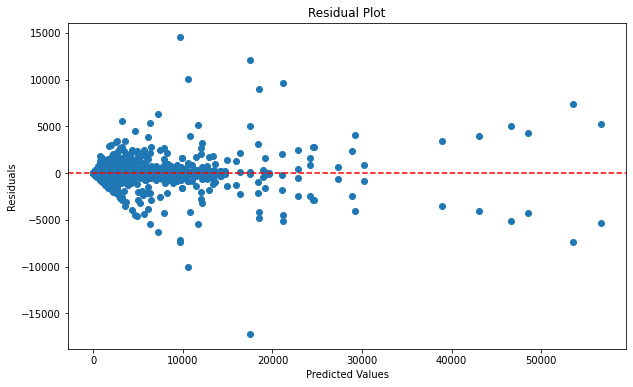

/opt/miniconda3/envs/research/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


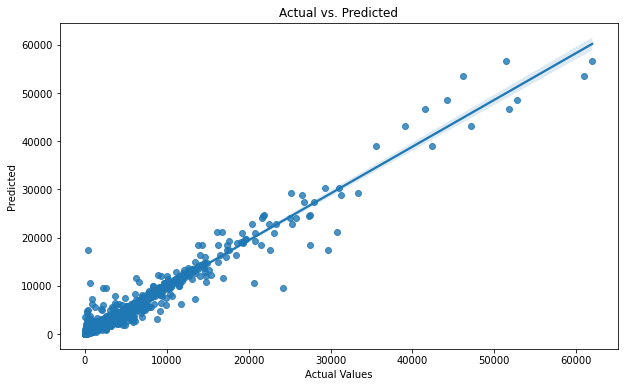

Val--------
Mean Squared Error: 46632.29455125955
MAPE: 0.1387696911260612
R-squared: 0.7819269350402827


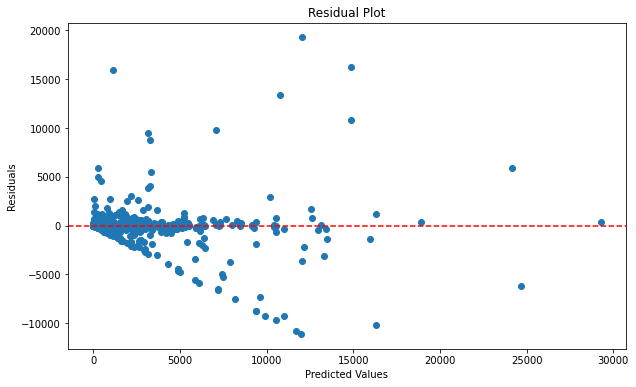

/opt/miniconda3/envs/research/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


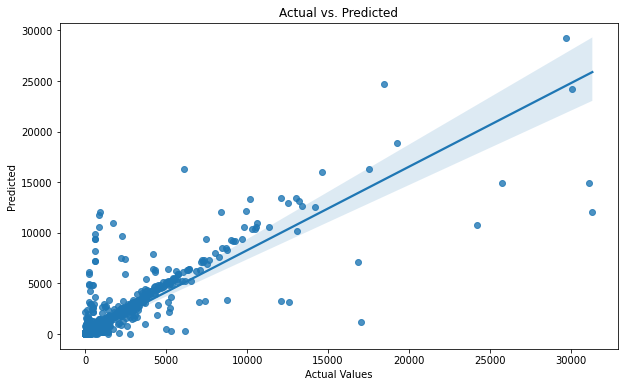

In [5]:
tree_model = DecisionTreeRegressor(max_depth=3000, min_samples_split=2, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_train, y_train)

y_hat_train = tree_model.predict(X_train)
y_hat_val = tree_model.predict(X_val)

print("Train--------")
get_r2_score(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train)
plot_actual_vs_pred(y_train, y_hat_train)

print("Val--------")
get_r2_score(y_val, y_hat_val)
plot_residuals(y_val, y_hat_val)
plot_actual_vs_pred(y_val, y_hat_val)

In [1]:
feature_importances = tree_model.feature_importances_

# Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


features_df = features_df.sort_values(by='Importance', ascending=False)
features_df

NameError: name 'tree_model' is not defined